In [28]:
import os


zinc_input_paths = {
    "ECFP4": os.environ["DATA"] + "/00_datasets/ZINC/ECFP4/",
    "ECFP2": os.environ["DATA"] + "/00_datasets/ZINC/ECFP2/",
    "GCF":  os.environ["DATA"] + "/00_datasets/ZINC/GCF/"
}

zinc_final_paths = {
    "ECFP4": os.environ["DATA"] + "/00_datasets/ZINC/complete_ZINC_ecfp4_dict.json",
    "ECFP2": os.environ["DATA"] + "/00_datasets/ZINC/complete_ZINC_ecfp2_dict.json",
    "GCF":  os.environ["DATA"] + "/00_datasets/ZINC/complete_ZINC_gen_cyclic_scaf_dict.json"
}


chembl_paths = {
    "ECFP4": os.environ["DATA"] + "/00_datasets/ChEMBL25/complete_ChEMBL_ecfp4_dict.json",
    "ECFP2": os.environ["DATA"] + "/00_datasets/ChEMBL25/complete_ChEMBL_ecfp2_dict.json",
    "GCF":  os.environ["DATA"] + "/00_datasets/ChEMBL25/complete_ChEMBL_gen_cyclic_scaf_dict.json"
}

chembl_drugs_paths = {
    "ECFP4": os.environ["DATA"] + "/00_datasets/chembl_drugs_patwalters_ecfp4_dict.json",
    "ECFP2": os.environ["DATA"] + "/00_datasets/chembl_drugs_patwalters_ecfp2_dict.json",
    "GCF": os.environ["DATA"] + "/00_datasets/chembl_drugs_patwalters_gen_cyclic_features.json" 
}

output_fig_path = os.environ["FIGURES"] + "/00_datasets/01.07_study_desc_ZINC_ChEMBL/"

os.makedirs(output_fig_path, exist_ok=True)

## Merging ZINC data

In [29]:
import json
from os.path import join
import glob

def merge_data(zinc_input_paths, zinc_final_paths, key):
    
    complete_dict = {}
    
    for path in glob.glob(zinc_input_paths[key]+ "*.json"):
            
        with open(path, "r") as f:
            curr_dict = json.load(f)
            
            for k, v in curr_dict.items():
                complete_dict[k] = complete_dict.get(k, 0) + v
                
    with open(zinc_final_paths[key], "w") as f:
        json.dump(complete_dict, f)
    

In [30]:
# merge_data(zinc_input_paths, zinc_final_paths, "ECFP4")

In [31]:
# merge_data(zinc_input_paths, zinc_final_paths, "ECFP2")

In [32]:
# merge_data(zinc_input_paths, zinc_final_paths, "GCF")

In [33]:
from IPython.display import display, HTML

def extract(path_dict):
    output_dict = {}
    
    for k, v in path_dict.items():
        
        with open(v, "r") as f:
            d = json.load(f)
        
        output_dict[k] = d 
    
    return output_dict

def count(dataset_dict, name):

    display(HTML("<h2>" + name + "</h2>"))
    for k, v in dataset_dict.items():
        print(k + " : " + str(len(v.keys())))
    
    
    

In [34]:
chembl_dict = extract(chembl_paths)
chembl_drugs_dict = extract(chembl_drugs_paths)
zinc_dict = extract(zinc_final_paths)

In [35]:
count(chembl_dict, "ChEMBL")

ECFP4 : 556187
ECFP2 : 16411
GCF : 5255


In [36]:
count(chembl_drugs_dict, "ChEMBL drugs")

ECFP4 : 9148
ECFP2 : 1757
GCF : 79


In [37]:
count(zinc_dict, "ZINC")

ECFP4 : 870877
ECFP2 : 22866
GCF : 4463


In [64]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
figsize = (7, 5)

def plot_distribution(chembl_dict, chembl_drugs_dict, zinc_dict):

    distributions_dict = {"occurrences": [], "dataset": [], "descriptor": []}
    
    for desc_key in chembl_dict.keys():
        for dataset, dataset_name, size in [(zinc_dict, "ZINC", 1006651037),
                                            (chembl_dict, "ChEMBL", 1817766)]:
#                                             (chembl_drugs_d10ict, "ChEMBL drugs", 1495)]:
            
            curr_values = list(np.array(list(dataset[desc_key].values())))
            distributions_dict["occurrences"].extend(curr_values)
            distributions_dict["descriptor"].extend(np.full((len(curr_values),), desc_key))
            distributions_dict["dataset"].extend(np.full((len(curr_values),), dataset_name))    
    
    
    df = pd.DataFrame.from_dict(distributions_dict)

    for desc_key in chembl_dict.keys():
         
        plt.figure(figsize=figsize)
        fig = sns.histplot(data=df[df["descriptor"] == desc_key], x="occurrences", hue="dataset",
                           bins=10, log_scale=True, kde=True, common_norm=False).set_title(desc_key)
#         fig = sns.kdeplot(data=df[df["descriptor"] == desc_key], x="occurrences", hue="dataset",
#                           log_scale=True, common_norm=False)
        
#         fig.set(xlim=(1e0, 1e9))
        plt.savefig(join(output_fig_path, "fig_"+desc_key+".png"), dpi=200)

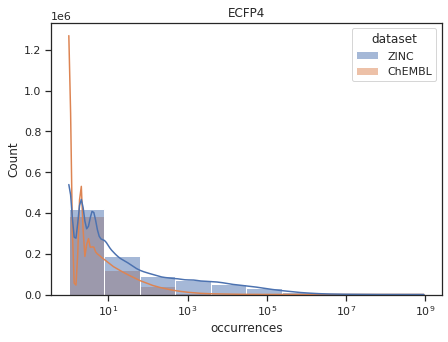

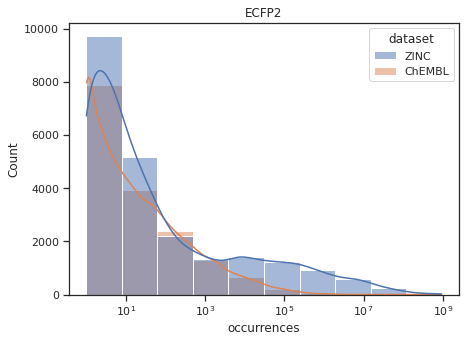

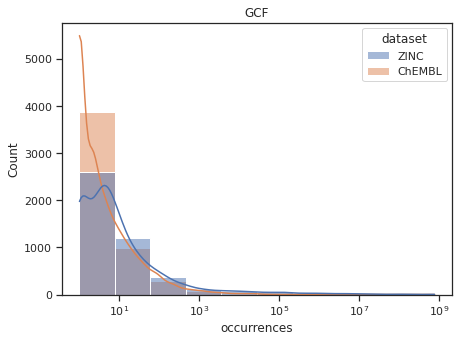

In [65]:
plot_distribution(chembl_dict, chembl_drugs_dict, zinc_dict)